In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import piecewise_regression
import re
def namestr(obj, namespace):
    return [name for name in namespace if namespace[name] is obj][0]
# ignore warnings
import warnings
warnings.filterwarnings("ignore")


In [10]:
df = pd.read_csv('all_data_fitting.csv')
df

,Sample,Polymer Concentration (wt%),Mixing Height and Lift Adjusted,Heated Container,Rest Time (days),Cast Position Adjusted,Fitting Success,Results,R Squared,Thickness,Observations
0,10_1,10,0,0,1,0,1,{'estimates': {'const': {'estimate': 0.0096600...,0.752200,0,"Some volume loss, some sticky portions (not en..."
1,12_1_1,12,0,0,1,0,1,{'estimates': {'const': {'estimate': 0.2394400...,0.848445,0,"Some volume loss, some sticky portions (not en..."
2,12_1_2,12,0,0,1,0,1,{'estimates': {'const': {'estimate': -1.097724...,0.859813,0,"Some volume loss, some sticky portions (not en..."
3,15_1,15,0,0,1,0,1,{'estimates': {'const': {'estimate': -1.072676...,0.948122,0,"Some volume loss, some sticky portions (not en..."
4,10_1_H,10,0,1,1,0,1,{'estimates': {'const': {'estimate': 0.6752411...,0.766467,0,"Some volume loss, some sticky portions (not en..."
5,12_1_H,12,0,1,1,0,1,{'estimates': {'const': {'estimate': 0.3871722...,0.850577,0,"Some volume loss, some sticky portions (not en..."
6,15_1_H,15,0,1,1,0,1,{'estimates': {'const': {'estimate': -0.219821...,0.857936,0,"Some volume loss, some sticky portions (not en..."
7,17_1_H,17,0,1,1,0,1,{'estimates': {'const': {'estimate': 0.3913324...,0.967954,0,"Some volume loss, some sticky portions (not en..."
8,10_2,10,1,0,1,0,1,{'estimates': {'const': {'estimate': 0.8478852...,0.807905,0,"No significant volume loss, no wrinkles"
9,12_2,12,1,0,1,0,1,{'estimates': {'const': {'estimate': 0.9764563...,0.842921,0,"No significant volume loss, no wrinkles"


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
import numpy as np

# Check for missing values and df types
missing_values = df.isnull().sum()
df_types = df.dtypes

# Convert 'R Squared' to a numerical format if it's not already
df['R Squared'] = pd.to_numeric(df['R Squared'], errors='coerce')

# Drop rows with missing target values
df.dropna(subset=['R Squared'], inplace=True)

# Prepare the feature matrix (X) and target vector (y)
X = df[['Polymer Concentration (wt%)','Mixing Height and Lift Adjusted', 'Heated Container','Cast Position Adjusted']]
y = df['R Squared']

# Split the dfset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the decision tree model
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate the R-squared score
r2 = r2_score(y_test, y_pred)

missing_values, df_types, r2

(Sample                             0
 Polymer Concentration (wt%)        0
 Mixing Height and Lift Adjusted    0
 Heated Container                   0
 Rest Time (days)                   0
 Cast Position Adjusted             0
 Fitting Success                    0
 Results                            0
 R Squared                          0
 Thickness                          0
 Observations                       0
 dtype: int64,
 Sample                              object
 Polymer Concentration (wt%)          int64
 Mixing Height and Lift Adjusted      int64
 Heated Container                     int64
 Rest Time (days)                     int64
 Cast Position Adjusted               int64
 Fitting Success                      int64
 Results                             object
 R Squared                          float64
 Thickness                           object
 Observations                        object
 dtype: object,
 -12.511962834986672)

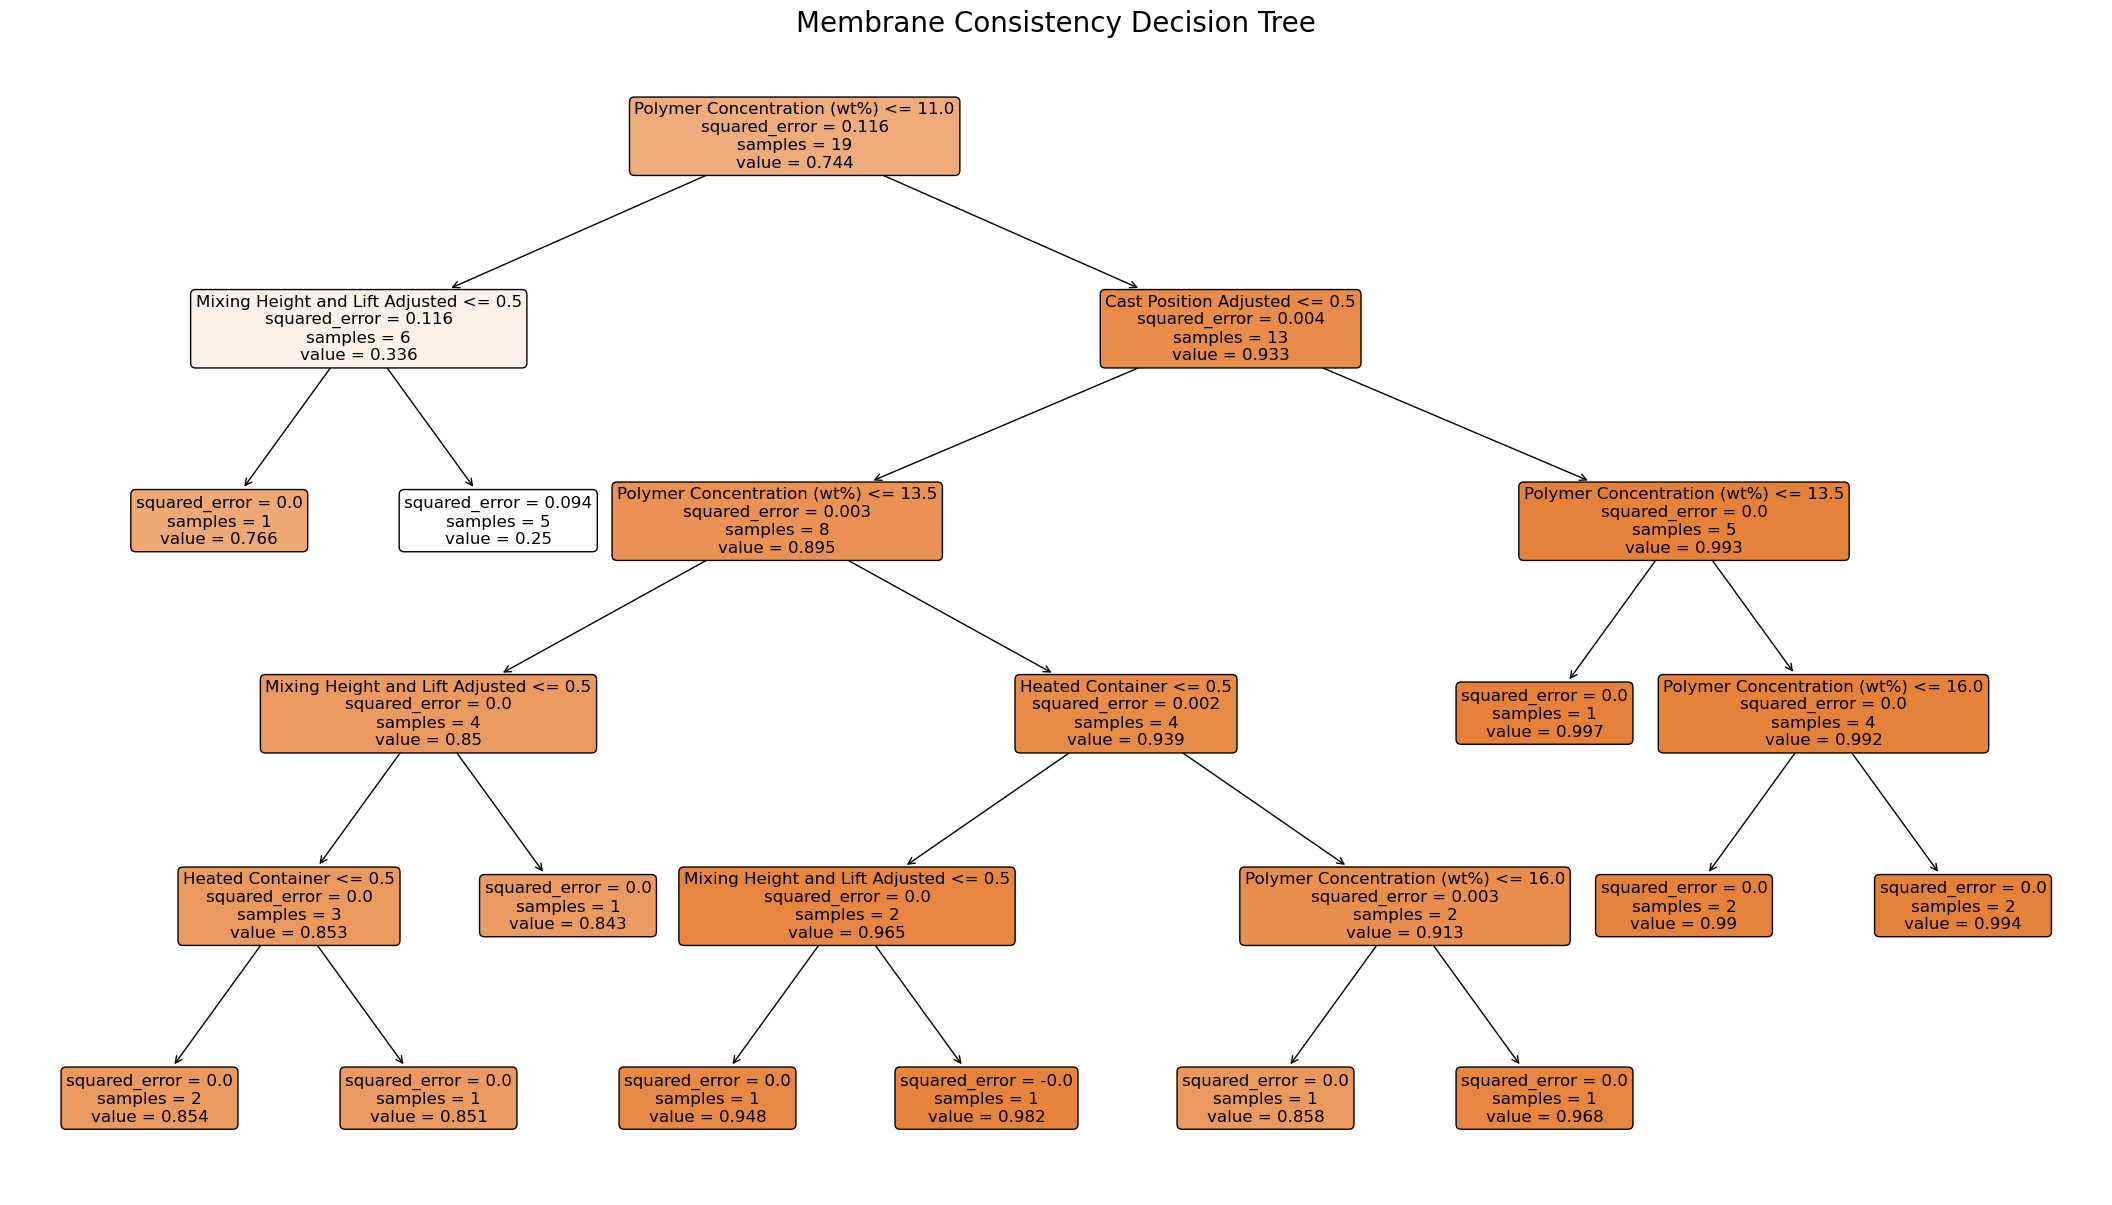

In [20]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Set the size of the plot
plt.figure(figsize=(27,15))

# Plot the decision tree
plot_tree(model, 
          feature_names=X_train.columns, 
          class_names='R Squared',
          filled=True, 
          rounded=True, 
          fontsize=12)

# Show the plot
plt.title('Membrane Consistency Decision Tree', fontsize=20)
plt.show()
